# Част II. Основи на Машинното Самообучение

## ЛУ 7: Дървета на Решенията за Класификация

### Теория

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree

Зареждаме познатия ни набор Ирис, след което заделяме количествените променливи като независими, а качествената променлива (вид) - като зависима. С други думи, ще се опитаме да тренираме алгоритъм, способен да предвиди вида ирис според размерите на близалцето и листата на неговия цвят.

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris.iloc[:,:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y = iris['species']

Особено подходящ за такъв вид класификация е алгоритъмът 'Дърво на решенията', който създава последователни правила, с които да раздели данните. Дървото има три вида възли: корен (най-горният), решение (коренът е първото решение) и листа (резултати без последващи решения). Тренираме дървото си.

In [5]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

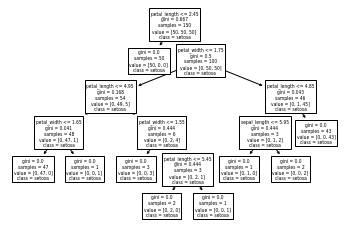

In [6]:
tree_viz = tree.plot_tree(clf, feature_names=iris.columns[:4], class_names=iris.species)

Чрез два допълнителни метода на matplotlib.pyplot можем да зададем по-големи размери на фигурата (figure(figsize=x,y)) и да запазим изображение в развойната си среда (savefig('filename')).

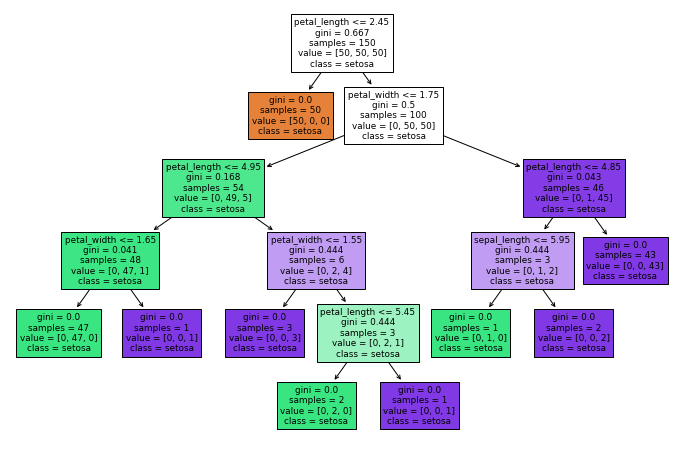

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree_viz = tree.plot_tree(clf, feature_names=iris.columns[:4], class_names=iris.species, filled=True)
plt.savefig('my_tree.png')

Нека опитаме да създадем дърво, което да предсказва шансовете за оцеляване на Титаник.

In [8]:
titanic = sns.load_dataset('titanic')

Ако се опитаме да вкараме всички категории освен оцеляемост като независими, алгоритъмът няма да приеме променливи под формата на низ:

In [9]:
X = titanic.drop(columns=['survived', 'alive'])
y = titanic['alive']

In [10]:
tree2 = tree.DecisionTreeClassifier()

In [11]:
try:
    tree2.fit(X,y)
except Exception as e:
    print(f'Unsuccessfull. Error: {e}')

Unsuccessfull. Error: could not convert string to float: 'male'


Може просто да оставим числените променливи, но тогава пък ще имаме проблем с липсващи стойности:

In [12]:
X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare']]
y = titanic['survived']

In [13]:
try:
    tree2.fit(X,y)
except Exception as e:
    print(f'Unsuccessfull. Error: {e}')

Unsuccessfull. Error: Input contains NaN, infinity or a value too large for dtype('float32').


Виждаме, че имаме лиспващи стойности само за възраст, затова махаме и тази променлива:

In [14]:
titanic[['pclass', 'age', 'sibsp', 'parch', 'fare']].isna().value_counts()

pclass  age    sibsp  parch  fare 
False   False  False  False  False    714
        True   False  False  False    177
dtype: int64

In [15]:
X = titanic[['pclass', 'sibsp', 'parch', 'fare']]

Налагаме дървото си, но виждаме, че то е твърде сложно, а не особено точно, дори и без да го тестваме на непознати данни:

In [16]:
tree2.fit(X,y)

DecisionTreeClassifier()

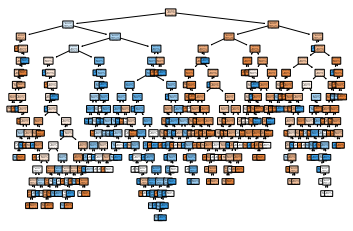

In [17]:
tree_viz = tree.plot_tree(tree2, feature_names=['pclass', 'sibsp', 'parch', 'fare'], class_names=titanic.alive, filled=True, rounded=True)

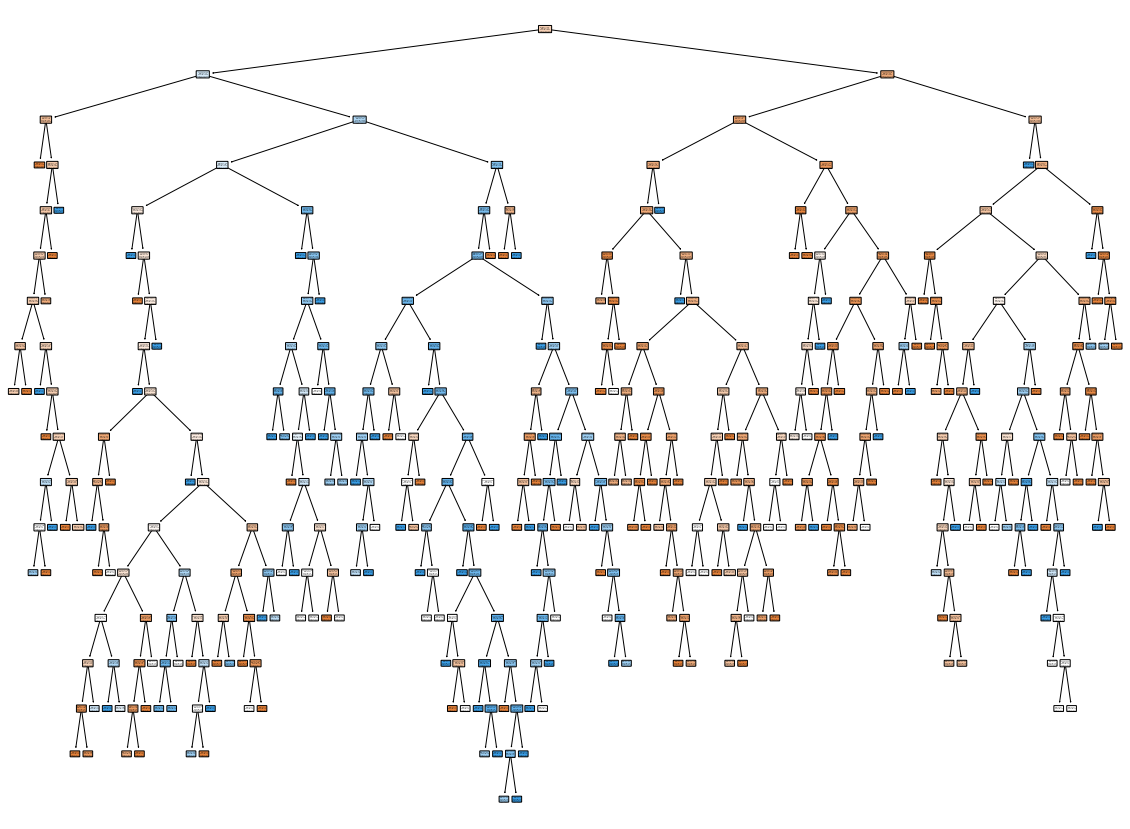

In [18]:
plt.figure(figsize=(20,15))
tree.plot_tree(tree2, feature_names=['pclass', 'sibsp', 'parch', 'fare'], class_names=titanic.alive, filled=True, rounded=True)
plt.savefig('my_tree2.png')

In [19]:
tree2.score(X,y)

0.8361391694725028

Нека сега опитаме да разделим данните си на тренировъчни и тестови. Виждаме, че дървото ни се справя по-добре с познатите данни, но значително по-зле с непознатите:

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.25)

In [21]:
tree3 = tree.DecisionTreeClassifier()
tree3.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
tree3.score(X_train, y_train)

0.8738738738738738

In [23]:
tree3.score(X_test, y_test)

0.6412556053811659

Нека се опитаме да трансформираме някои от променливите, които премахнахме по-рано:

In [24]:
X.head()

,pclass,sibsp,parch,fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500


In [25]:
X['age'] = titanic.age.fillna(titanic.age.mean())

C:\Users\Atanas\AppData\Local\Temp\ipykernel_13588\1586317255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = titanic.age.fillna(titanic.age.mean())


In [26]:
X['sex'] = titanic.sex.map({'female': 1, 'male': 2})

C:\Users\Atanas\AppData\Local\Temp\ipykernel_13588\300719399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = titanic.sex.map({'female': 1, 'male': 2})


In [27]:
titanic.deck.isna().value_counts()

True     688
False    203
Name: deck, dtype: int64

In [28]:
titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [29]:
decks = list('ABCDEFG')
decks

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [30]:
deck_map = dict(zip(decks, range(1,8)))
deck_map

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [31]:
titanic['deck_as_int'] = titanic.deck.map(deck_map)
X['deck'] = titanic.deck_as_int.fillna(4)

C:\Users\Atanas\AppData\Local\Temp\ipykernel_13588\673795262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['deck'] = titanic.deck_as_int.fillna(4)


Сега можем да тренираме по-пълен модел:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.25)

In [33]:
tree4 = tree.DecisionTreeClassifier()
tree4.fit(X_train, y_train)
tree4.score(X_train, y_train)

0.9954954954954955

In [34]:
tree4.score(X_test, y_test)

0.7384155455904334

In [35]:
pd.crosstab(X_train.sex, y_train)

survived,0,1
sex,,
1,16,62
2,112,32


Нека разгледаме различни възможности за псотрояване на същото дърво с различни дълбочини:

In [36]:
tree5 = tree.DecisionTreeClassifier(max_depth=5)
tree5.fit(X_train, y_train)
tree5.score(X_train, y_train)

0.8783783783783784

In [37]:
tree5.score(X_test, y_test)

0.8071748878923767

In [38]:
tree6 = tree.DecisionTreeClassifier(max_depth=4)
tree6.fit(X_train, y_train)
tree6.score(X_train, y_train), tree6.score(X_test, y_test)

(0.8468468468468469, 0.8251121076233184)

In [39]:
tree7 = tree.DecisionTreeClassifier(max_depth=3)
tree7.fit(X_train, y_train)
tree7.score(X_train, y_train), tree7.score(X_test, y_test)

(0.8333333333333334, 0.8176382660687593)

In [40]:
tree8 = tree.DecisionTreeClassifier(max_depth=2)
tree8.fit(X_train, y_train)
tree8.score(X_train, y_train), tree8.score(X_test, y_test)

(0.7972972972972973, 0.7907324364723468)

In [41]:
tree9 = tree.DecisionTreeClassifier(max_depth=1)
tree9.fit(X_train, y_train)
tree9.score(X_train, y_train), tree9.score(X_test, y_test)

(0.7837837837837838, 0.7877428998505231)

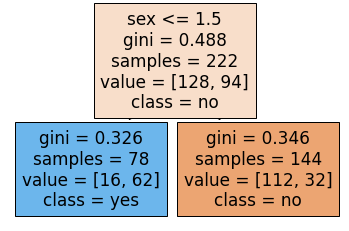

In [42]:
tree_viz = tree.plot_tree(tree9, feature_names=X.columns, class_names=titanic.alive, filled=True)

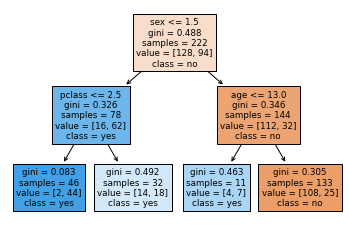

In [43]:
dot_data = tree.plot_tree(tree8, feature_names=X.columns, class_names=titanic.alive, filled=True)

### Задача

Тренирайте дърво на решенията, което да предвижда определена качествена променлива.

1. Идентифицирайте три или повече независими променливи. Те могат да са всякакви освен номинални качествени променливи и трябва да бъдат представени в числови стойности.
2. Идентифирицайте една зависима качествена променлива с не повече от 5 уникални стойности.
3. Създайте модел според класа DecisionTreeClassifier().
4. Разделете данните си на тренировъчни и тестови чрез train_test_split() (имайте предвид, че връща 4 обекта в определен ред!)
5. Тренирайте модела си върху тренировъчните данни.
6. Изчислете колко точен е моделът ви върху тренировъчните данни чрез метода score().
7. Изчислете точността на модела си и върху тестовите данни.

Линк към наборите данни на библиотеката seaborn: https://github.com/mwaskom/seaborn-data.

### Примери за Произволни Гори

In [44]:
import pandas as pd

#### Пример 1: Титаник

In [45]:
from seaborn import load_dataset
titanic = load_dataset('titanic')
titanic = titanic.dropna()

Особено удобен метод за превръщане на категорийни променливи в цифрови е one-hot encoding, или съдаването на фиктивни (dummy) променливи. Както виждаме, това става лесно чрез метода pd.get_dummies. Всяка уникална стойност на категорийните променливи бива взета и превърната в набор от бинарни колонки. Напр. вместо колона за палуби A-G имаме 7 колонки, които ни казват дали палубата е A, B, C и т.н. Вероятно се досещате, че този метод ни позволява да енкодираме и номинални променливи за употреба в нашия модел, тъй като не трябва да спазваме определен ред на променливите.

In [46]:
titanic_d = pd.get_dummies(titanic.drop(columns=['survived', 'alive']))

In [47]:
X = titanic_d.drop(['adult_male',  'alone'], axis=1)
y= titanic['alive']

In [48]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y)

Както виждаме, произволната гора не винаги се справя по-добре от индивидуално дърво:

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(X_tr, y_tr)
dtr.score(X_tr, y_tr), dtr.score(X_ts, y_ts)

(1.0, 0.8043478260869565)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_tr, y_tr)
rf.score(X_tr, y_tr), rf.score(X_ts, y_ts)

(1.0, 0.7391304347826086)

#### Пример 2: Гъби

Наборът Mushrooms ни дава данни за 8124 индивида гъби и дали те са отровни (p) или ядливи (e).

In [51]:
mushrooms=pd.read_csv('https://datahub.io/machine-learning/mushroom/r/mushroom.csv')
mushrooms.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [52]:
mushrooms.shape

(8124, 23)

In [53]:
mushrooms.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [54]:
mushrooms_d=pd.get_dummies(mushrooms.drop('class', axis=1))

In [55]:
X = mushrooms_d
y=mushrooms['class']

In [56]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y,test_size=.25)

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf = RandomForestClassifier(n_estimators=100, max_depth=50)
rf.fit(X_tr,y_tr)

RandomForestClassifier(max_depth=50)

In [59]:
rf.score(X_tr,y_tr)

1.0

In [60]:
rf.score(X_ts,y_ts)

1.0

In [61]:
rf.predict(X)

array(['p', 'e', 'e', ..., 'e', 'p', 'e'], dtype=object)

In [62]:
rf.estimators_[:3]

[DecisionTreeClassifier(max_depth=50, max_features='auto',
                        random_state=808670603),
 DecisionTreeClassifier(max_depth=50, max_features='auto',
                        random_state=1845879956),
 DecisionTreeClassifier(max_depth=50, max_features='auto',
                        random_state=1964992153)]

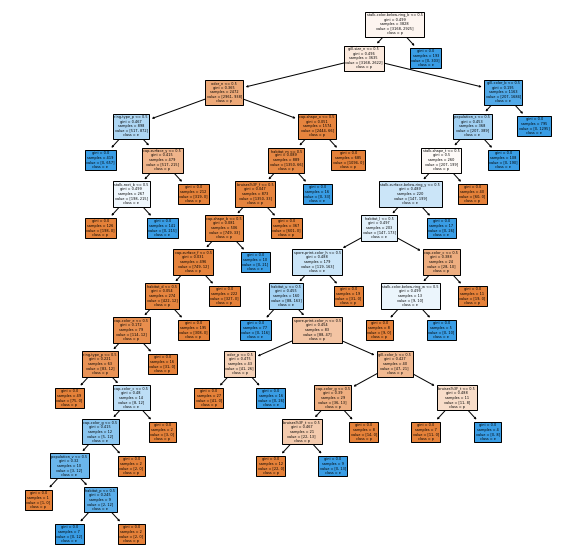

In [63]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(rf.estimators_[57], feature_names=X.columns, class_names=y.unique(), filled=True)
plt.savefig('tree_57.png')

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(X_tr, y_tr)
dtr.score(X_tr, y_tr), dtr.score(X_ts, y_ts)

(1.0, 1.0)

Отново виждаме че в случая по-добър модел би било дърво.

Друг важен начин да опростим модела си включва подбор на променливи. След като сме тренирали дървесен модел, можем да проверим важността на различните независими променливи в дървото. Макар методът да връща просто числени стойности, лесно можем да видим за кои колони се отнасят като индексираме списъка от стойности с имената на колонките:

In [65]:
rf.feature_importances_[:5]

array([0.00240047, 0.00012853, 0.00047694, 0.00016241, 0.00073131])

In [66]:
print('The 5 most important features in the model are:')
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:5]

The 5 most important features in the model are:


odor_n                 0.128512
odor_f                 0.075103
gill-size_n            0.057671
gill-size_b            0.057626
spore-print-color_h    0.042374
dtype: float64

Виждаме, че относително малко променливи носят особена сила на модела. В бъдеща итерация на модела бихме могли да премахнем или трансформираме множество от променливите.

#### Пример 3: Диаманти

Тук използваме дърво на решенията като регресор (т.е. резултатът ни е количествена прменлива), за да предвидим цената на диаманти. В такива случи конкретното дърво на решенията предвижда количества, а резултатът на гората е осредненият продукт на всички дървета.

In [67]:
diamonds = load_dataset('diamonds')

In [68]:
diamonds.shape

(53940, 10)

In [69]:
y = diamonds.price
X = pd.get_dummies(diamonds.drop('price',axis=1))


In [70]:
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=.3)

In [71]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(Xtr,ytr)
reg.score(Xtr,ytr), reg.score(Xts, yts)

(0.9972673387788015, 0.9803534120514786)

In [72]:
from sklearn.tree import DecisionTreeRegressor
tr_reg = DecisionTreeRegressor()
tr_reg.fit(Xtr,ytr)
tr_reg.score(Xtr,ytr), tr_reg.score(Xts, yts)

(0.9999938439198138, 0.9645720152448184)

In [73]:
importances = reg.feature_importances_
importances_series = pd.Series(importances, index = X.columns)
importances_series.head()

carat    0.594175
depth    0.003111
table    0.002336
x        0.007469
y        0.289169
dtype: float64

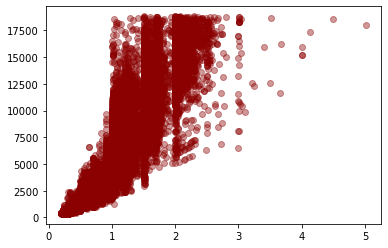

In [74]:
diamonds['pred_price'] = reg.predict(X)
_ = plt.scatter(diamonds.carat, diamonds.price, color = 'DarkRed', alpha=.4)

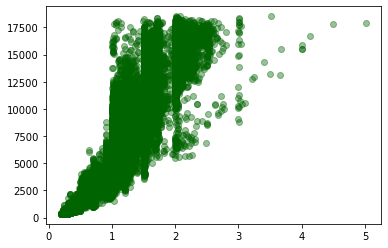

In [75]:
_ = plt.scatter(diamonds.carat, diamonds.pred_price, color='DarkGreen', alpha=.4)

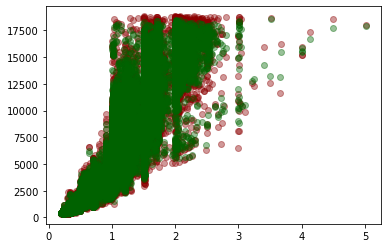

In [76]:
plt.scatter(diamonds.carat, diamonds.price, color = 'DarkRed', alpha=.4)
_ = plt.scatter(diamonds.carat, diamonds.pred_price, color='DarkGreen', alpha=.4)

### Задача

Тренирайте произволна гора върху избран от Вас набор данни, следвайки следните стъпки:

1. Идентифицирайте три или повече независими променливи. Те могат да са всякакви освен номинални качествени променливи и трябва да бъдат представени в числови стойности.
2. Идентифирицайте една зависима качествена променлива с не повече от 5 уникални стойности.
3. Създайте модел според класа RandomForestClassifier().
4. Разделете данните си на тренировъчни и тестови чрез train_test_split() (имайте предвид, че връща 4 обекта в определен ред!)
5. Тренирайте модела си върху тренировъчните данни.
6. Изчислете колко точен е моделът ви върху тренировъчните данни чрез метода score().
7. Изчислете точността на модела си и върху тестовите данни.
8. Изчислете тежестта на всяка независима променлива във Вашата произволна гора чрез feature_importances_.

## ЛУ 8: Линейна Регресия

Линейната регресия ни позволява да предвидим отношението между две количествени променливи. От настоящето упражнение с очаква да разбирате точки 1 до 3, като 4 и 5 са с допълнителна информация.

In [1]:
import pandas as pd #зареждаме pandas за работа с данни
import altair as alt #зареждаме altair за визуализация (алтернатива на matplotlib)

In [2]:
ansc = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/anscombe.csv', sep=',') 
#зареждаме примерния набор данни anscombe, съдържаем по подразбиране в Colab
ansc.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Отдолу имаме точкова визуализация в Altair, като всяка серия е оцветена в различен цвят. Chart() определя набора данни, encode() определя функцията на всяка променлива, mark_point() определя вида на визуализацията като точкова диаграма (scatterplot), а interactive() прави диаграмата интерактивна (можем да приближаваме и отдалечаваме, както и да местим графиката). Интересни са кодовете за променливи след имената на съответните променливи, където:
N = nominal
O = ordinal
Q = quantitative
T = time data

In [3]:
alt.Chart(ansc).encode(x='x:Q',y='y:Q',color='dataset:N').mark_point()

alt.Chart(...)

### Прилагане на Линеен Модел

#### Създаване на Модел

Наборът данни anscombe е специално направен, за да покаже нуждата от визуализации (най-често чрез точкови диаграми), когато чертаем линейна регресия.

Наборът съдържа 4 серии от координати, като всяка серия има еднаква регресия, но твърде различни стойности. Нека проверим това експериемнтално. Първо, зареждаме класа Линейна Регресия от модула линеен модел на библиотеката scikit learn:

In [4]:
from sklearn.linear_model import LinearRegression

Първата стъпка винаги е да създадем инстанция на класа, която да съдържа модела ни. Ако LinearRegression() е общ набор от поведения за обект (клас), то променливата lm1 ще е конкретна инстанция на този клас, която ще бъде тренирана и прилагана независимо то други модели за линейна регресия.

In [5]:
lm1= LinearRegression()


#### Трениране на Модела

След това трябва да използваме метода fit() за да напаснем (или тренираме) модела си върху определени данни. В случая се опитваме да изпозлваме колонката X за серия I като независима променлива и колонката Y за серия I като зависима.

Макар мисленето ни да е правилно, получаваме грешка че моделът иска масив с форма (-1,1) ако независимата ни променлива има само едно измерение.

In [6]:
try:
    lm1.fit(ansc[ansc.dataset=='I']['x'], ansc[ansc.dataset=='I']['y'])
except Exception as e:
    print(f'Error found: {e}')

Error found: Expected 2D array, got 1D array instead:
array=[10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


Нека проверим как да трансформираме колонката:

In [7]:
ansc[ansc.dataset=='I']['x'].head() #първо, изкарваме самата колонка

0    10.0
1     8.0
2    13.0
3     9.0
4    11.0
Name: x, dtype: float64

In [8]:
ansc[ansc.dataset=='I']['x'].values #после изкарваме от нея само стойностите (без индекса). Отбележете, че в случая вместо pd.Series получаваме numpy масив.

array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])

In [9]:
X = ansc[ansc.dataset=='I']['x'].values.reshape(-1,1) 
#Сега вече спокойно можем да преобразуваме този масив в изискваните измерения.

Опитваме да наложим модела си отново, този път с независимата ни променлива в изискваните измерения.

In [10]:
lm1= LinearRegression()
lm1.fit(X, ansc[ansc.dataset=='I']['y'])

LinearRegression()

#### Проверяване на Резултати

Изглежда моделът ни сработи. Нека проверим дали наистина той е произвел изходните стойности коефициент и интерсепт. Те се извикват чрез атрибутите coef_ и intercept_.

In [11]:
lm1.coef_

array([0.50009091])

In [12]:
lm1.intercept_

3.0000909090909094

Наистина, имаме коефициент и интерсепт. нека проверим дали това работи за серии 2-4:

In [13]:
lm2 = LinearRegression()
lm2.fit(ansc[ansc.dataset=='II']['x'].values.reshape(-1,1), ansc[ansc.dataset=='II']['y'])

LinearRegression()

In [14]:
lm2.coef_, lm2.intercept_

(array([0.5]), 3.000909090909089)

In [15]:
lm3 = LinearRegression()
lm3.fit(ansc[ansc.dataset=='III']['x'].values.reshape(-1,1), ansc[ansc.dataset=='III']['y'])
lm3.coef_, lm3.intercept_

(array([0.49972727]), 3.002454545454545)

In [16]:
lm4 = LinearRegression()
lm4.fit(ansc[ansc.dataset=='IV']['x'].values.reshape(-1,1), ansc[ansc.dataset=='IV']['y'])
lm4.coef_, lm4.intercept_

(array([0.49990909]), 3.0017272727272726)

Както казахме в началото, наистина получаваме едни и същи стойности за коефициент и интерсепт за всички серии (с минимални разлики), въпреки тяхната различна подредба в пространството, т.е. можем да приложим едно и също уравнение върху всички серии.

След като имаме коефициент и интерсепт, можем да предвидим стойностите на Y за всяко X. Това става чрез модела *y = x * b + a*, където **b** е коефициентът на отношение между *x* и *y*, а **a** е интерсептът, т.е. къде започва отношението между двете променливи. За да сметнем предвидените стойности на Y, т.е. нашият линеен модел, прилагаме това уравнение върху цялата колонка X.

In [17]:
ansc['LM'] = ansc['x']*lm1.coef_+lm1.intercept_
ansc.LM.head()

0    8.001000
1    7.000818
2    9.501273
3    7.500909
4    8.501091
Name: LM, dtype: float64

Вместо да създаваме нова колонка, можем и да създадем нов набор с функцията predict(), която кара нашия модел да предвиди зависимата променлива за всяка стойност на независимата. Макар първото решение да е по-практично ако работим с линейна регресия, методът predict() е изключително полезен когато работим с по-сложни модели, където предикцията на модела рядко може да бъде обобщена с едно уравнение.

In [18]:
lm1_y = lm1.predict(X)
lm1_y

array([ 8.001     ,  7.00081818,  9.50127273,  7.50090909,  8.50109091,
       10.00136364,  6.00063636,  5.00045455,  9.00118182,  6.50072727,
        5.50054545])

### Реални срещу Предвидени Данни

След като вече имаме нашите предвидени стойности за всяко х, можем да ги сравним с реалните стойности за първа серия:

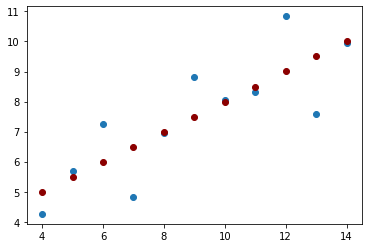

In [19]:
import matplotlib.pyplot as plt
plt.scatter(ansc[ansc.dataset=='I']['x'],ansc[ansc.dataset=='I']['y'])
plt.scatter(ansc[ansc.dataset=='I']['x'],lm1_y, color='DarkRed')

Тъй като, логично, всичките предвидени стойности са в линия, можем вместо метода scatter() да използваме plot(), който ни връща непрекъсната линия:

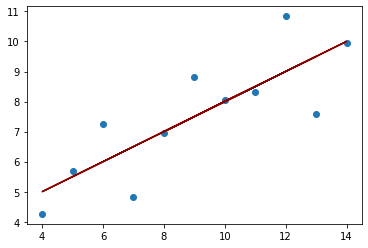

In [20]:
plt.scatter(ansc[ansc.dataset=='I']['x'],ansc[ansc.dataset=='I']['y'])
plt.plot(ansc[ansc.dataset=='I']['x'],ansc[ansc.dataset=='I']['LM'], color='DarkRed')

Нека направим същото за серии 2, 3 и 4:

In [21]:
lm2_y = lm2.predict(ansc[ansc.dataset=='II']['x'].values.reshape(-1,1))

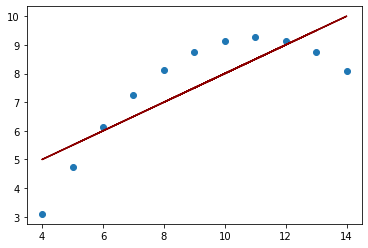

In [22]:
plt.scatter(ansc[ansc.dataset=='II']['x'],ansc[ansc.dataset=='II']['y'])
plt.plot(ansc[ansc.dataset=='II']['x'],lm2_y, color='DarkRed')

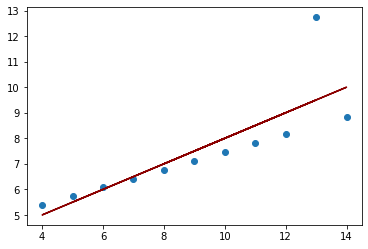

In [23]:
plt.scatter(ansc[ansc.dataset=='III']['x'],ansc[ansc.dataset=='III']['y'])
plt.plot(ansc[ansc.dataset=='III']['x'],ansc[ansc.dataset=='III']['LM'], color='DarkRed')

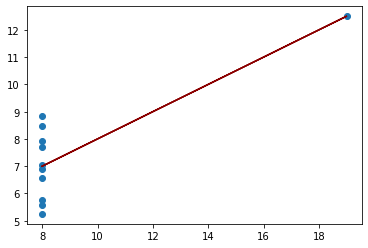

In [24]:
plt.scatter(ansc[ansc.dataset=='IV']['x'],ansc[ansc.dataset=='IV']['y'])
plt.plot(ansc[ansc.dataset=='IV']['x'],ansc[ansc.dataset=='IV']['LM'], color='DarkRed')

#### Изчисляване на R^2
След като видяхме разликата между реални и предвидени данни, можем да се запознаем и с метриката, която изчислява доколко тези две съвпадат. В случая на линейните модели, това е метриката R^2, която изчислява отклонението на всяко реално у от неговата предвидена стойност.

В scikit learn това става чрез метода score()

Интересното за данните от anscombe е че всички серии имат еднакво отклонение от модела:

In [25]:
lm1.score(X,ansc[ansc.dataset=='I']['y'])

0.6665424595087748

In [26]:
lm1.score(ansc[ansc.dataset=='II']['x'].values.reshape(-1,1),ansc[ansc.dataset=='II']['y'])

0.6662420117029543

In [27]:
lm1.score(ansc[ansc.dataset=='III']['x'].values.reshape(-1,1),ansc[ansc.dataset=='III']['y'])

0.6663234677330083

In [28]:
lm1.score(ansc[ansc.dataset=='IV']['x'].values.reshape(-1,1),ansc[ansc.dataset=='IV']['y'])

0.6667071687067613

### Тренировъчни и Тестови Данни

Често когато тренираме модел искаме също така да тестваме неговата точност върху данни, които не е виждал преди това, т.е. да видим доколко е полезен когато се изправи срещу проблеми от реалния свят.

Например, ако създадем модел, който да предвижда дължината на близалцето на перуники от набора данни iris, то ще очакваме моделът ни да се справя добре, когато му бъдат дадени стойности за индивид перуника, който не е записан в набора. За да симулираме непознати данни, обикновено разделяме набора си на тренировъчни и тестови данни, като вторите обикновено са около 10% от целия набор данни (в случая на iris, ще имаме 135 случая за трениране на модела и 15 за тестване, макар обикновено да се работи с доста по-високи стойности).

Нека изпробваме този метод върху набора tips, който съдържа информация за бакшишите получени от сервитьори в ресторант при различни клиенти. Да речем че искаме да тренираме модел с линейна регресия да предвижда бакшиша според пълната сметка.

In [29]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
tips.shape

(244, 7)

Наборът ни има 244 записа, като от тях искаме на произволен принцип да вземем 10% и да ги заделим за тестване след като тренираме модела. Това става с функцията train_test_split() от модула sklearn.model_selection. Методът ни дава 4 обекта, съдържащи тренировъчни и тестови данни за х и у. За позиционни аргументи слагаме независимата променлива и зависимата променлива, а с ключова дума въвеждаме параметъра test_size, който казва какъв процент ще бъде отделен за тестване.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tips.total_bill.values.reshape(-1,1), tips.tip, test_size=0.1)

Сега можем да тренираме нов модел lm_tips вурху тренировъчните си данни. Виждаме слаба връзка (10%) между цяла сметка и големина на бакшиша в набора.

In [32]:
lm_tips = LinearRegression()
lm_tips.fit(X_train,y_train)
lm_tips.coef_, lm_tips.intercept_

(array([0.09937864]), 1.002033159819069)

Ако тестваме точността ѝ върху тренировъчните данни, виждаме слаба точност (.46/1)

In [33]:
lm_tips.score(X_train, y_train)

0.44463934418504036

Тествана върху непознати данни, точността е още по-малка (.36/1). В бъдеще можем да построим по-сложен модел, който да предвижда големината на бакшиша с по-голяма точност, разчитайки на повече фактори.

In [34]:
lm_tips.score(X_test,y_test)

0.4437329739532434

### Трениране Върху Няколко Независими Променливи
Можем да тренираме набора си и върху Х с много измерения, където у ще бъде предвиден на база няколко променливи., т.е. ще имаме уравнението

image.png

В такъв случай говорим за множествена регресия.




In [35]:
iris = sns.load_dataset('iris')

Обикновено е хубаво да проверим доколко различните ни променливи са свързани една с друга. Това става най-лесно като извикаме матрица на техните корелации чрез метода corr():

In [36]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Както виждаме, имаме доста високи нива на корелация между различни променливи >.50, което означава, че моделът ни няма да е оптимален. По-нататък ще научим начини за справяне с този проблем, но засега можем да се опитаме да построим модела си въпреки това.

Тъй като ще работим с количествени променливи, изкарваме променливата 'вид' от набора.

In [37]:
iris=iris.drop(columns=['species'])

Взимаме за независими променливи първите три колонки:

In [38]:
X = iris.iloc[:,:3]

Докато зависима ще е четвъртата:

In [39]:
y=iris['petal_width']

Тренираме модела си:

In [40]:
lm5 = LinearRegression()
lm5.fit(X,y)
lm5.coef_, lm5.intercept_

(array([-0.20726607,  0.22282854,  0.52408311]), -0.24030738911225935)

И проверяваме с каква точност се справя той:

In [41]:
lm5.score(X,y)

0.9378502736046809

Както виждаме, множествената регресия е способна да създаде доста точен модел. Нека го визуализираме.

In [42]:
predicted_y = lm5.predict(X) #създаваме променлива, която да държи предвидените ни стойности за у
iris['lm']=lm5.predict(X) #добавяме я и към рамката данни в случай че искаме да визуализираме с altair (вж. 5.)
predicted_y[:5]

array([0.2162519 , 0.14629084, 0.17990145, 0.28316183, 0.25926136])

Тъй като получената линия е сложна функция (т.е. не е права), използваме метода lineplot() на библиотеката seaborn вместо plt.plot(). Резултатът е как функцията ни се отнася спрямо променливата sepal_length. Seaborn също ни дава стойности на грешка за различни диапазони от функцията (червените полета около линията).

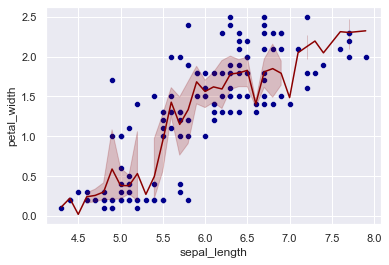

In [43]:
sns.set() #това не е задължително, но задава по-приятен вид на графиките ни
sns.scatterplot(
    x=iris['sepal_length'],
    y=y, 
    color='DarkBlue'
)
_ = sns.lineplot(
    x = iris['sepal_length'],
    y = predicted_y, 
    color='DarkRed')

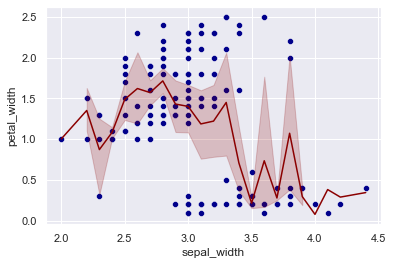

In [44]:
sns.scatterplot(
    x=iris['sepal_width'],
    y=y, 
    color='DarkBlue'
)
_ = sns.lineplot(
    x = iris['sepal_width'],
    y = predicted_y, 
    color='DarkRed')

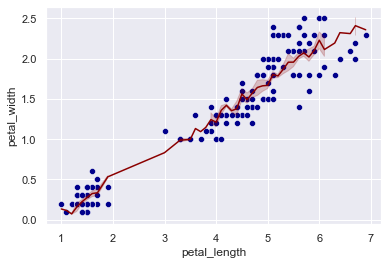

In [45]:
sns.scatterplot(
    x=iris['petal_length'],
    y=y, 
    color='DarkBlue'
)
_ = sns.lineplot(
    x = iris['petal_length'],
    y = predicted_y, 
    color='DarkRed')

### Още Примери за Визуализация чрез Altair

Долу имаме една от регресиите и точковите диаграми на Анскомб начертани с altair вместо с matplotlib.

In [46]:
import altair as alt
lm_vis=alt.Chart(ansc[ansc.dataset=='I']).encode(x='x', y='LM').mark_line()
scatter_vis=alt.Chart(ansc[ansc.dataset=='I']).encode(x='x', y='y').mark_point(color='red')
lm_vis+scatter_vis

alt.LayerChart(...)

Ето и пример за множествена регресия (забележете, че линията не е заглаждана изкуствено, както в seaborn):

In [47]:
scatter = alt.Chart(iris).encode(x='petal_length', y = 'petal_width').mark_point()
regression = alt.Chart(iris).encode(x='petal_length', y= 'lm').mark_line(color='red')
scatter+regression

alt.LayerChart(...)

### Задача

1. Идентифицирайте една или повече независими количествени променливи (по възможност непрекъснати). Ако решите да имате няколко независими променливи, прегледайте точка 4.
2. Идентифирицайте една зависима количествена променлива.
3. Създайте модел според класа LinearRegression().
4. Разделете данните си на тренировъчни и тестови чрез train_test_split() (имайте предвид, че връща 4 обекта в определен ред!)
5. Тренирайте модела си върху тренировъчните данни.
6. Изкарайте коефициент и интерсепт за модела си чрез атрибутите coef_ и intercept_.
7. Предвидете всяка стойност на зависимата променлива чрез метода predict().
8. Изчислете колко точен е моделът ви върху тренировъчните данни чрез метода score().
9. Изчислете точността на модела си и върху тестовите данни.
10. Визуализирайте модела си с matplotlib, seaborn или altair.

## ЛУ 9: Клъстъризиране

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans


Първо ще тестваме метода върху изкуствен набор от стойности, създаден специално за да има определен прой скупвания на данни, използвайки функцията make_blobs.

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples = 200, centers=4, cluster_std = 0.5, random_state = 0) # Тук създаваме набор от данни Х, съдържащ 200 реда данни с две колонки (х и у), чиито стойности са събрани около 4 центъра, с отклонение 0.5. Параметърът random_state ни позволява репликация на произволния резултат.
X[:5]

array([[ 2.20438661,  1.56085661],
       [-1.13374003,  2.68467271],
       [ 1.06498315,  4.10289686],
       [-2.37603789,  7.32420659],
       [ 1.68289011,  0.48444439]])

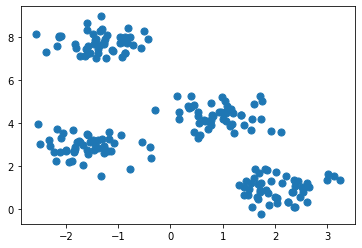

In [5]:
_ = plt.scatter(X[:, 0], X[:, 1], s=50)

Създаваме инстанция на KMeans клъстъризиращ алгоритъм с брой на клъстърите 4 (защото предварително знаем, че имаме толкова):

In [6]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

KMeans(n_clusters=4)

Създаваме предвидени стойности и виждаме, че алгоритъмът ни успешно е предвидил в кой клъстър седи всяка точка от данните (опитайте се да експериментирате с по-малко или повече клъстъри и вижте какво се получава):

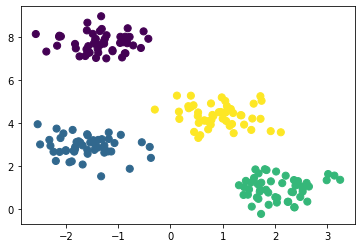

In [7]:
y_pred = kmeans.predict(X)
_ = plt.scatter(
    X[:, 0], 
    X[:, 1], 
    c = y_pred, 
    s=50
)

In [8]:
y_pred[:5]

array([2, 1, 3, 0, 2])

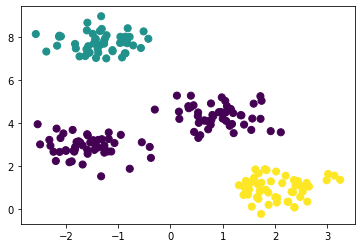

In [9]:
kmeans_3= KMeans(n_clusters=3)
kmeans_3.fit(X)
y3_pred = kmeans_3.predict(X)
_ = plt.scatter(X[:, 0], X[:, 1], c = y3_pred, s=50)

Нека опитаме да тренираме клъстъризиращ алгоритъм върху истински данни:

In [10]:
iris = sns.load_dataset('iris')

In [11]:
X = iris.iloc[:,:4]

In [12]:
kmeans = KMeans(n_clusters = 3) #създаваме инстанция с три клъстъра (колкото знаем че са видовете перуника в набора)
kmeans.fit(X) #тренираме модела си само върху независими променливи!
predicted_y = kmeans.fit_predict(X) #предвиждаме стойностите на предполагаемата зависима променлива
predicted_y[:5]

array([1, 1, 1, 1, 1])

Вече можем да видим, че имаме съотвествие между трите клъстъра на алгоритъма и трите вида перуники в набора данни. Нека опитаме да начертаем резултатите си:

In [13]:
iris.species.astype('category').cat.codes.head() # Това е друг вариант за енкодиране на категорийна променлива освен map и get_dummies

0    0
1    0
2    0
3    0
4    0
dtype: int8

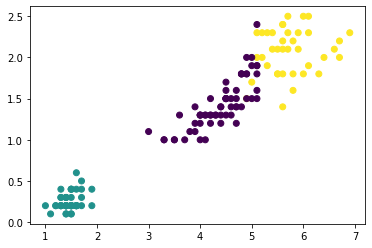

In [14]:
_ = plt.scatter(iris.petal_length, iris.petal_width, c=predicted_y) #това са предвидените ни клъстъри


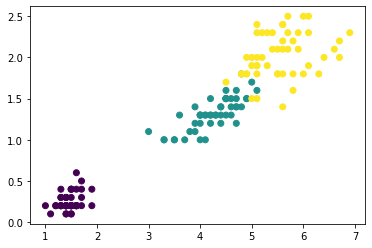

In [15]:
_ = plt.scatter(iris.petal_length, iris.petal_width, c=iris.species.astype('category').cat.codes) # това са реалните групи цветя

In [16]:
kmeans.inertia_

78.851441426146

За да сравним ефикасността на различни броеве центроиди, можем да начертаем графика.

In [17]:
wcss = []
max_test_clusters = 10
for i in range(1, max_test_clusters):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

c:\Users\Atanas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.44618205128206,
 39.03998724608725,
 34.427777417027414,
 30.26621437982308,
 27.894012189564823]

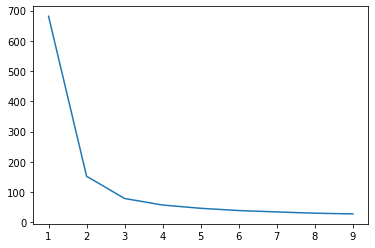

In [18]:
_ = plt.plot(list(range(1, max_test_clusters)), wcss)

Виждаме, че най-драстична промяна в инерцията на алгоритъма (средното отдалечение от центроидите) е при 3, т.е. 3 клъстъра са оптимални в нашия случай.

### Задача

1. Тренирайте клъстъризиращ алгоритъм върху набор от количествени променливи във Вашите данни. Изберете произволно колчиество клъстъри или опитайте няколко пъти с различни количества.
2. Визуализирайте клъстърите си спрямо две от независимите променливи.
3. Стандартизитайре променливите си чрез StandardScaler.
4. Приложете PCA върху тях.
5. Идентифицирайте оптимално количество компоненти.
6. Тренирайте отново модела си с оптимално количество компоненти.
7. Начертайте клъстърите си спрямо първите два главни компонента